<a href="https://colab.research.google.com/github/MutiMao/proyectoIA/blob/main/ProyectoAlquilerCasas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 22345706280.93725
R-squared: 0.978109866629427
Prediction for June 2025: 2232789.702985011


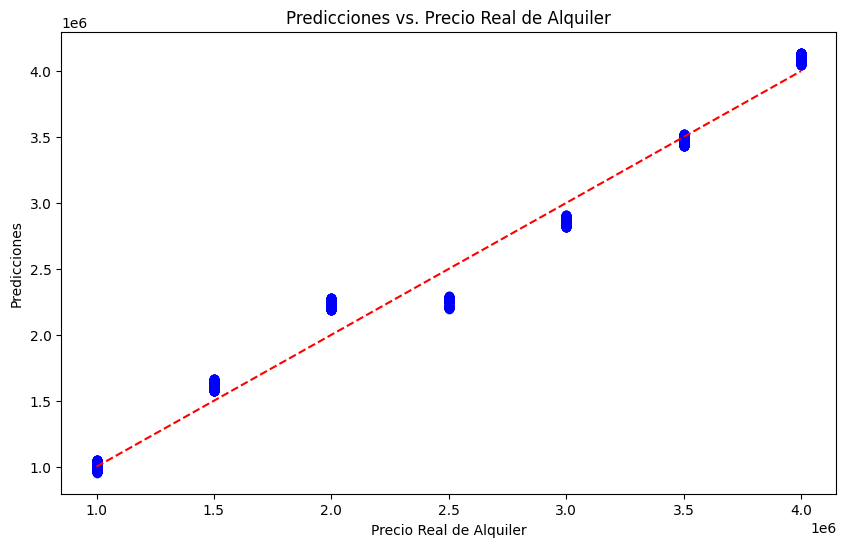

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_excel('/content/sample_data/casas_version_final2.xlsx')
except FileNotFoundError:
    print("Error: 'casas_version_final2.xlsx' not found. Please upload the file.")
    exit()


# Convert 'barrio' to numerical codes
barrio_mapping = {barrio: code for code, barrio in enumerate(df['barrio'].unique())}
df['barrio_code'] = df['barrio'].map(barrio_mapping)

# Define features (X) and target (y)
features = ['tipo', 'tamano', 'barrio_code', 'estrato', 'habitaciones', 'baños','mes', 'año']
X = df[features]
y = df['precio_alquiler']

# Check for missing values and handle them (e.g., imputation)
for col in X.columns:
    if X[col].isnull().any():
      X[col].fillna(X[col].mean(), inplace=True)

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Prediction for June 2025
# Example data point (replace with your desired values)
new_data = pd.DataFrame([[1, 100, 10, 3, 2, 2, 6, 2025]], columns = features)
new_data_normalized = scaler.transform(new_data)
june_2025_prediction = model.predict(new_data_normalized)
print(f"Prediction for June 2025: {june_2025_prediction[0]}")

"""# Plotting (Example with 'tamano') assuming tamano is in the 1st column of X_test
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, color='black', label='Actual Prices')  # Assuming 'tamano' is the second feature
plt.plot(X_test[:, 1], y_pred, color='blue', linewidth=2, label='Regression Line') # Assuming 'tamano' is the second feature
plt.xlabel('Tamaño (Normalized)')
plt.ylabel('Precio de Alquiler')
plt.title('Multiple Linear Regression Model')
plt.legend()
plt.show()"""


# Graficar las predicciones vs. precio real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Puntos azules para las predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea roja diagonal
plt.xlabel('Precio Real de Alquiler')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Precio Real de Alquiler')
plt.show()